#  CMS provider payment and coverage analysis
This project undertakes a comprehensive examination of variations in payments and coverage across different states, drawing on data from the [Centers for Medicare and Medicaid Services](https://data.cms.gov/provider-summary-by-type-of-service/medicare-inpatient-hospitals/medicare-inpatient-hospitals-by-provider). 

We have meticulously processed the Medicare Inpatient Hospitals data at the hospital level to analyze the statistical characteristics of payments, coverage, and their geographical distribution, using the R programming language.

Data dictionary: https://data.cms.gov/resources/medicare-inpatient-hospitals-by-provider-data-dictionary

In [2]:
library(tidyverse)
library(lubridate)     

In [3]:
data18 <- read.csv("Medicare_Inpatient_Hospitals_by_Provider_2018.csv", stringsAsFactors = FALSE, dec=",")
data19 <- read.csv("Medicare_Inpatient_Hospitals_by_Provider_2019.csv", stringsAsFactors = FALSE, dec=",")
data20 <- read.csv("Medicare_Inpatient_Hospitals_by_Provider_2020.csv", stringsAsFactors = FALSE, dec=",")
data21 <- read.csv("Medicare_Inpatient_Hospitals_by_Provider_2021.csv", stringsAsFactors = FALSE, dec=",")

In [4]:
head(data18)

Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_St,Rndrng_Prvdr_City,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Tot_Submtd_Cvrd_Chrg,Tot_Pymt_Amt,Tot_Mdcr_Pymt_Amt,Tot_Dschrgs,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,AL,365240728,75848592,65634615,6996,...,0.419821606,0.479286422,0.748860258,0.75,0.595837463,0.1296333,0.578196234,0.088800793,0.18592666,2.086595113
10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,35957,AL,58327634,24745522,19899502,3071,...,0.396052632,0.438157895,0.666666667,0.75,0.535964912,0.114473684,0.585087719,0.075877193,0.154385965,1.761785808
10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,35630,AL,216511653,46577016,38613206,5178,...,0.37254902,0.4409115,0.725490196,0.75,0.609167992,0.1118177,0.563063063,0.05590885,0.142289348,1.889106769
10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,36467,AL,9790291,4604338,3832272,707,...,0.381930185,0.431211499,0.556468173,0.75,0.605749487,0.09650924,0.53798768,0.135523614,0.151950719,1.803546271
10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,36049,AL,3100435,1424941,1209627,171,...,0.276119403,0.417910448,0.582089552,0.75,0.567164179,0.067164179,0.559701493,0.097014925,0.119402985,1.731700249
10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,35235,AL,163559892,34234753,28624702,2932,...,0.405721717,0.450801907,0.680104031,0.75,0.576939749,0.081924577,0.44863459,0.098396186,0.133506719,2.052724473


Adding Year variable to the datasets

In [5]:
data18$Year <- 2018
data19$Year <- 2019
data20$Year <- 2020
data21$Year <- 2021

I will combine the datasets with rbind. rbind combines datasets by rows. (In order to combine the datasets, the number and the names of the columns must be the same in the datasets)

In [6]:
df <- rbind(data18, data19, data20, data21)
dim(df)

[1] 12737    46

Compute two ratios:
- ratio_paid_submit = Total Payment Amount / Total Covered Charges
- ratio_medicare = Total Medicare Payment Amount / Total Payment Amount

In [55]:
df_summary_21 <- df %>% 
  filter(Year == 2021) %>%
  group_by(Rndrng_Prvdr_State_Abrvtn) %>%
  summarise(total_submit=sum(Tot_Submtd_Cvrd_Chrg)/1000000, # unit = $Millon
            total_paid = sum(Tot_Pymt_Amt)/1000000,
            total_medicare = sum(Tot_Mdcr_Pymt_Amt)/1000000,
            ratio_paid_submit = sum(Tot_Pymt_Amt)/sum(Tot_Submtd_Cvrd_Chrg),
            ratio_medicare = sum(Tot_Mdcr_Pymt_Amt)/sum(Tot_Pymt_Amt)
           ) 


In [56]:
df_summary_21%>%top_n(5, wt = ratio_medicare)%>% arrange(desc(ratio_medicare))

Rndrng_Prvdr_State_Abrvtn,total_submit,total_paid,total_medicare,ratio_paid_submit,ratio_medicare
MD,4324.0859,4007.8839,3700.7187,0.9268743,0.9233598
WY,583.0662,220.8512,198.3222,0.3787756,0.8979901
MT,1192.7049,410.5575,363.6703,0.3442239,0.8857961
MA,10583.0435,4328.3341,3815.4155,0.4089877,0.8814975
MO,10899.2469,2551.7448,2240.2582,0.2341212,0.8779319


In [57]:
df_summary_21%>%top_n(-5, wt = ratio_medicare)%>% arrange(ratio_medicare)

Rndrng_Prvdr_State_Abrvtn,total_submit,total_paid,total_medicare,ratio_paid_submit,ratio_medicare
DC,2994.844,701.4520,536.0083,0.2342199,0.7641411
HI,1231.660,422.2494,331.6609,0.3428296,0.7854622
PA,29192.029,5773.8048,4608.2471,0.1977870,0.7981300
TN,11878.998,2709.8974,2171.3734,0.2281251,0.8012751
AL,8665.756,1755.3703,1408.4710,0.2025640,0.8023783


In [42]:
library(ggplot2)

In [58]:
df_summary_21_rm_na <- df_summary_21 %>% filter(!is.na(ratio_medicare))

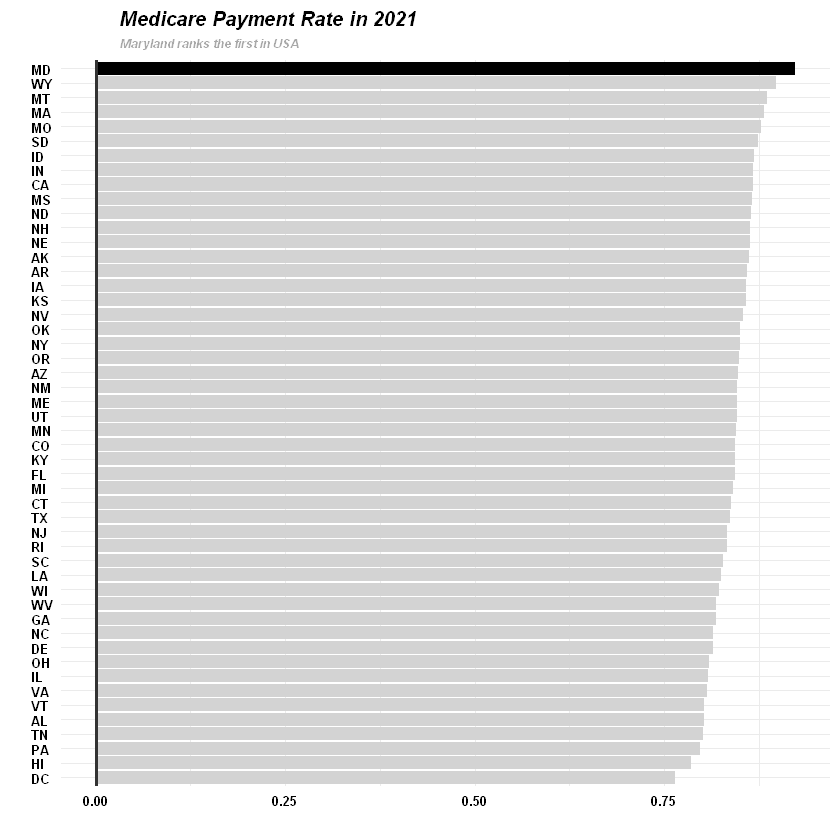

In [77]:
plot_state <-  ggplot(df_summary_21_rm_na, aes(x = reorder(Rndrng_Prvdr_State_Abrvtn, ratio_medicare), y=ratio_medicare)) +
    geom_bar(stat="identity", position="identity", fill=ifelse(df_summary_21_rm_na$Rndrng_Prvdr_State_Abrvtn == "MD", "black", "lightgrey")) +
    geom_hline(yintercept = 0, size = 1, colour="#333333") +
    coord_flip() + 
    theme_minimal() +
    theme( axis.text.x = element_text(face="bold", color='black', size=8),
          axis.text.y = element_text(face="bold", color='black', size=8, hjust = 0))+
    xlab("") + ylab("")+ 
    labs(title = "  Medicare Payment Rate in 2021", subtitle = "Maryland ranks the first in USA")+
    theme(plot.title = element_text(hjust = 0.1, color='black', size=12, face="bold.italic"), plot.subtitle = element_text(hjust = 0.1, size=7, color = 'darkgrey', face = "bold.italic"))
plot_state

# Year trend

In [34]:
head(df)

Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_St,Rndrng_Prvdr_City,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Tot_Submtd_Cvrd_Chrg,Tot_Pymt_Amt,Tot_Mdcr_Pymt_Amt,Tot_Dschrgs,...,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre,Year
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,AL,365240728,75848592,65634615,6996,...,0.479286422,0.748860258,0.75,0.595837463,0.1296333,0.578196234,0.088800793,0.18592666,2.086595113,2018
10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,35957,AL,58327634,24745522,19899502,3071,...,0.438157895,0.666666667,0.75,0.535964912,0.114473684,0.585087719,0.075877193,0.154385965,1.761785808,2018
10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,35630,AL,216511653,46577016,38613206,5178,...,0.4409115,0.725490196,0.75,0.609167992,0.1118177,0.563063063,0.05590885,0.142289348,1.889106769,2018
10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,36467,AL,9790291,4604338,3832272,707,...,0.431211499,0.556468173,0.75,0.605749487,0.09650924,0.53798768,0.135523614,0.151950719,1.803546271,2018
10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,36049,AL,3100435,1424941,1209627,171,...,0.417910448,0.582089552,0.75,0.567164179,0.067164179,0.559701493,0.097014925,0.119402985,1.731700249,2018
10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,35235,AL,163559892,34234753,28624702,2932,...,0.450801907,0.680104031,0.75,0.576939749,0.081924577,0.44863459,0.098396186,0.133506719,2.052724473,2018


In [43]:
df_summary_year <- df %>% 
    filter(!is.na(Tot_Mdcr_Pymt_Amt) & !is.na(Tot_Pymt_Amt))%>%
    group_by(Year) %>%
    summarise(total_submit=sum(Tot_Submtd_Cvrd_Chrg)/1000000, # unit = $Millon
            total_paid = sum(Tot_Pymt_Amt)/1000000,
            total_medicare = sum(Tot_Mdcr_Pymt_Amt)/1000000,
            ratio_paid_submit = sum(Tot_Pymt_Amt)/sum(Tot_Submtd_Cvrd_Chrg),
            ratio_medicare = sum(Tot_Mdcr_Pymt_Amt)/sum(Tot_Pymt_Amt)
           ) 


In [44]:
df_summary_year

Year,total_submit,total_paid,total_medicare,ratio_paid_submit,ratio_medicare
2018,594189.9,134939.0,113209.3,0.2270975,0.8389662
2019,613463.4,136958.2,114818.1,0.2232541,0.8383444
2020,568277.1,127486.6,107749.7,0.2243388,0.8451843
2021,579874.1,128664.0,108279.3,0.2218827,0.8415661


The ratio_paid_submit and ratio_medicare both decreased slightly over the span of 2018 to 2021.